### Chatbot with LangGraph

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install langsmith

In [3]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00


In [4]:
from google.colab import userdata

In [6]:
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith_api_key = userdata.get('LANGSMITH_API_KEY')

In [7]:
import os

os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_PROJECT'] = 'Courselanggraph'

In [8]:
from langchain_groq import ChatGroq

In [9]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name = "Gemma2-9b-It")

In [10]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78d34c2a6d10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78d34c2a5a50>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Start to building chatbot Using LangGraph

In [11]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [13]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation define how this state key should be updated
    # (in this case, it appends message to list, rathern than overwriting them)

  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [14]:
graph_builder

In [15]:
def chatbot(state:State):
  return {"messages": llm.invoke(state['messages'])}

In [16]:
graph_builder.add_node("chatbot", chatbot)

In [17]:
graph_builder

In [18]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [19]:
graph = graph_builder.compile()

In [20]:
graph

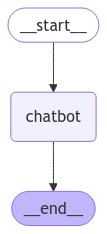

In [21]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))

except Exception:
  pass

In [24]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit','q']:
    print("Good Bye")
    break
  for event in graph.stream({"messages": ("user",user_input)}):
    print(event.values)
    for value in event.values():
      print(value['messages'])
      print("Assistant: ", value['messages'].content)

User: Hello
<built-in method values of AddableUpdatesDict object at 0x78d34bfaa200>
content='Hello! 👋 \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 4e-07, 'queue_time': 0.01404882, 'total_time': 0.030909491}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-365402b6-8761-4213-8a19-003b6d603d02-0' usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27}
Assistant:  Hello! 👋 

What can I do for you today? 😊

User: What is a generative AI?
<built-in method values of AddableUpdatesDict object at 0x78d34c09f100>
content="Let's break down what generative AI is:\n\n**What is Generative AI?**\n\nGenerative AI is a type of artificial intelligence that focuses on creating new content. This content can take many forms:\n\n* **Text:**  Writing storie